In [1]:
#importing required pyhton libraries

In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import OneHotEncoder
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression


In [3]:
#getting the data

In [43]:
# Read Excel file
file_path = r"student_depression.csv" 
df = pd.read_csv(file_path)

# Display first 5 rows
df.head(2) 

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,5-6 hours,Healthy,B.Pharm,Yes,3,1.0,No,1
1,8,Female,24,Bangalore,Student,2,0,5.90,5,0,5-6 hours,Moderate,BSc,No,3,2.0,Yes,0


In [5]:
df.shape

(27901, 18)

In [6]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [7]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [8]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [9]:
df["Financial Stress"].mean()

3.1398666571080365

In [10]:
df['Financial Stress'].fillna(df['Financial Stress'].mean(), inplace=True)


In [11]:
df_encoded = pd.get_dummies(df.drop(['id'], axis=1), drop_first=True)


In [12]:
ohe=OneHotEncoder()
ohe.fit_transform(df_encoded).toarray()

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.]])

In [13]:
# Detect boolean columns
bool_cols = df_encoded.select_dtypes(include='bool').columns

# Convert them to 0/1
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

In [14]:
df_encoded.dtypes

Age                                            int64
Academic Pressure                              int64
Work Pressure                                  int64
CGPA                                         float64
Study Satisfaction                             int64
                                              ...   
Degree_MSc                                     int32
Degree_Others                                  int32
Degree_PhD                                     int32
Have you ever had suicidal thoughts ?_Yes      int32
Family History of Mental Illness_Yes           int32
Length: 110, dtype: object

In [15]:
df_encoded.select_dtypes(include=['object', 'bool']).columns


Index([], dtype='object')

In [16]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Columns: 110 entries, Age to Family History of Mental Illness_Yes
dtypes: float64(2), int32(101), int64(7)
memory usage: 12.7 MB


In [17]:
df_encoded.shape

(27901, 110)

In [44]:
df_encoded.head(3)

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression,Gender_Male,...,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes,Financial_Stress_cat_unmanaged,Work_Hours_heavy_work,Work_Hours_norm_work,Academic_Pressure_no_worry,Academic_Pressure_worried
0,33,5,0,8.97,2,0,3,1.0,1,1,...,0,0,0,1,0,0,0,1,0,1
1,24,2,0,5.90,5,0,3,2.0,0,0,...,0,0,0,0,1,0,0,1,1,0
2,31,3,0,7.03,5,0,9,1.0,0,1,...,0,0,0,0,1,0,1,0,0,1


In [19]:
df_encoded.corr()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression,Gender_Male,...,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
Age,1.000000,-0.075803,0.002015,0.005056,0.009235,-0.000432,-0.032928,-0.095020,-0.226422,0.009071,...,0.065570,0.030048,0.119339,0.057694,0.050235,0.044670,0.006238,0.093811,-0.113502,-0.004861
Academic Pressure,-0.075803,1.000000,-0.022231,-0.022239,-0.110988,-0.024945,0.095970,0.151697,0.474835,-0.022222,...,0.001616,-0.026990,-0.007282,0.010190,-0.012263,-0.012845,-0.005089,0.008289,0.261510,0.030069
Work Pressure,0.002015,-0.022231,1.000000,-0.050896,-0.021145,0.770652,-0.005468,0.001883,-0.003351,0.008715,...,-0.001564,-0.001928,-0.001414,-0.000799,-0.000812,-0.002064,-0.000346,-0.001350,-0.001003,-0.006207
CGPA,0.005056,-0.022239,-0.050896,1.000000,-0.044062,-0.053631,0.002604,0.005885,0.022210,0.036040,...,-0.011347,-0.012501,0.003470,-0.021467,-0.002804,-0.020501,-0.001621,0.001970,0.008512,-0.003752
Study Satisfaction,0.009235,-0.110988,-0.021145,-0.044062,1.000000,-0.021907,-0.036441,-0.065102,-0.167971,-0.015789,...,-0.014336,-0.006156,0.000209,0.013754,0.004384,-0.022957,-0.000769,-0.000521,-0.083490,-0.003880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Degree_MSc,0.044670,-0.012845,-0.002064,-0.020501,-0.022957,-0.003238,0.000679,0.005622,-0.006388,0.017464,...,-0.033760,-0.041615,-0.030536,-0.017244,-0.017524,1.000000,-0.007480,-0.029144,0.008815,0.006064
Degree_Others,0.006238,-0.005089,-0.000346,-0.001621,-0.000769,-0.000544,-0.012425,0.005710,0.001043,-0.001025,...,-0.005669,-0.006987,-0.005127,-0.002895,-0.002942,-0.007480,1.000000,-0.004894,-0.004513,-0.001902
Degree_PhD,0.093811,0.008289,-0.001350,0.001970,-0.000521,0.009799,-0.015478,-0.003131,-0.010540,-0.013776,...,-0.022085,-0.027224,-0.019976,-0.011281,-0.011464,-0.029144,-0.004894,1.000000,-0.012800,0.004432
Have you ever had suicidal thoughts ?_Yes,-0.113502,0.261510,-0.001003,0.008512,-0.083490,-0.003389,0.121315,0.209131,0.546277,-0.001239,...,-0.003068,-0.019061,0.001067,-0.000980,0.001022,0.008815,-0.004513,-0.012800,1.000000,0.026213


In [20]:
df_encoded.shape

(27901, 110)

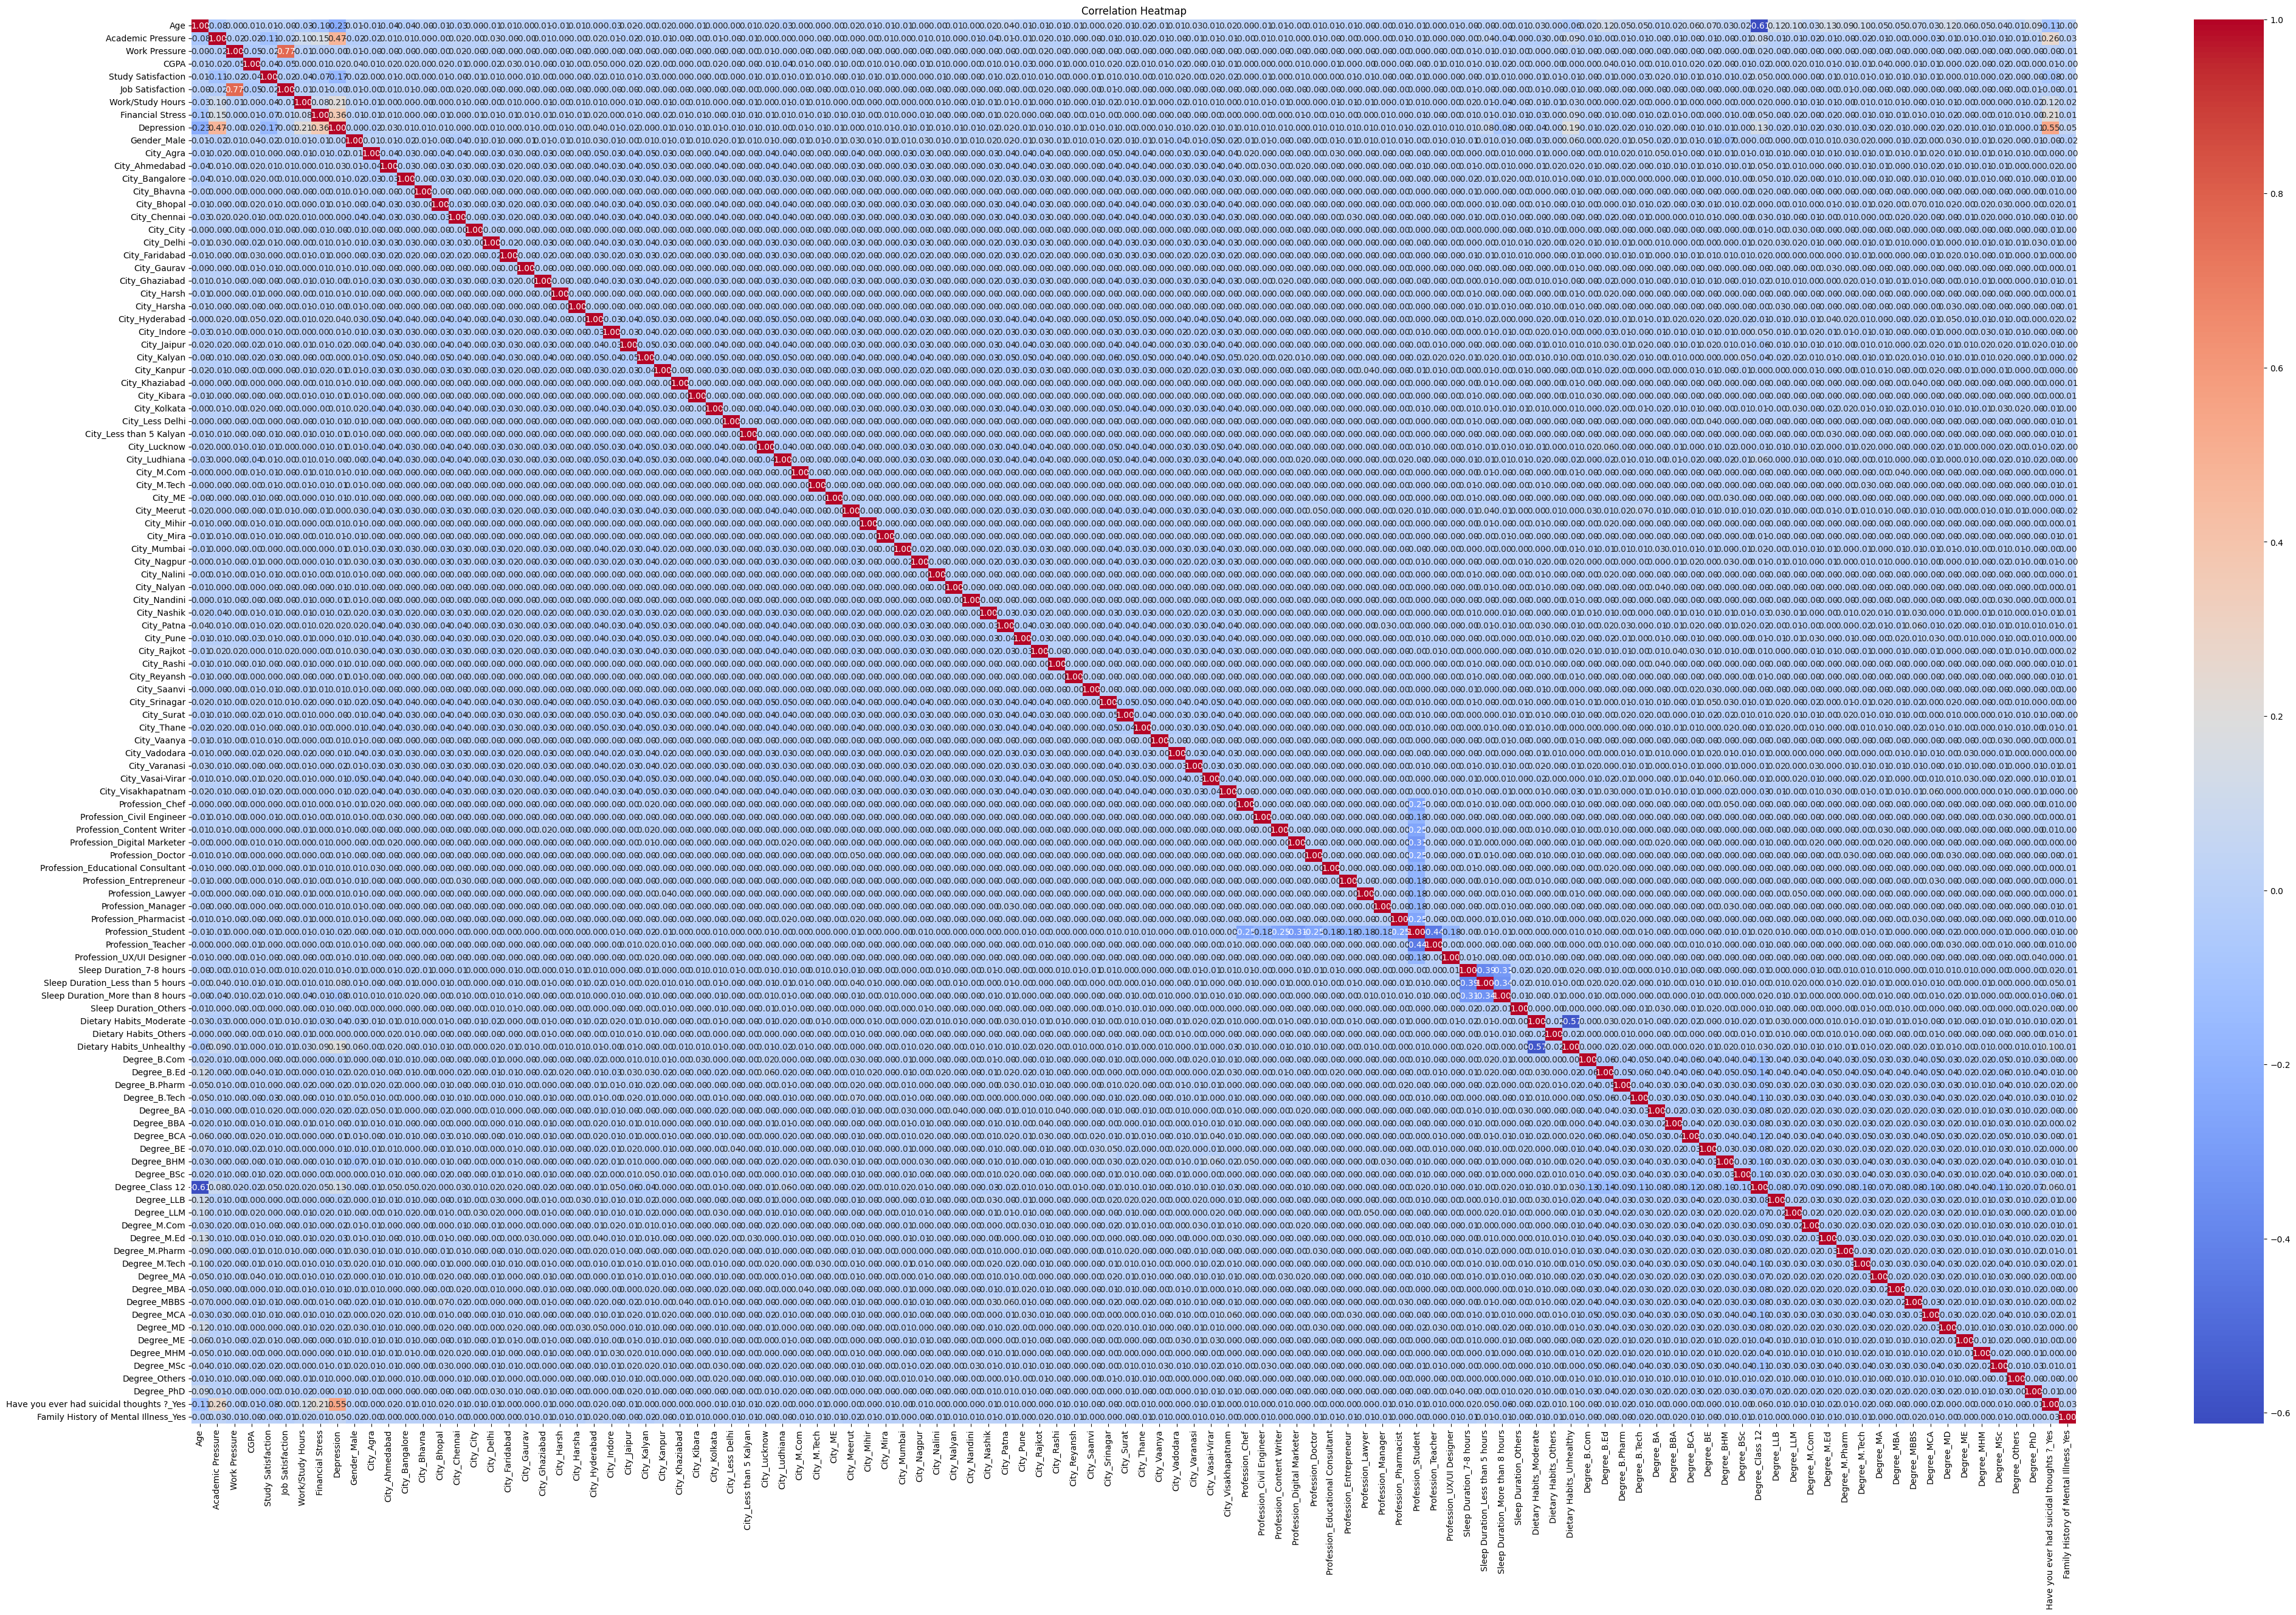


Top 10 correlated features with target:
Have you ever had suicidal thoughts ?_Yes    0.546277
Academic Pressure                            0.474835
Financial Stress                             0.363568
Work/Study Hours                             0.208563
Dietary Habits_Unhealthy                     0.189352
Degree_Class 12                              0.130970
Sleep Duration_Less than 5 hours             0.078830
Family History of Mental Illness_Yes         0.053430
City_Hyderabad                               0.038255
City_Ahmedabad                               0.033356
Name: Depression, dtype: float64


In [21]:
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(50, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
target = 'Depression'  # change to your target column
correlation_with_target = correlation_matrix[target].drop(target).sort_values(ascending=False)

print("\nTop 10 correlated features with target:")
print(correlation_with_target.head(10))

In [22]:
df_encoded.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression,Gender_Male,...,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,...,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499,0.557220,...,0.024945,0.037418,0.020501,0.006631,0.006846,0.042651,0.001254,0.018709,0.632809,0.483961
std,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437269,0.492645,0.496724,...,0.155961,0.189787,0.141709,0.081159,0.082456,0.202072,0.035396,0.135498,0.482048,0.499752
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
#for insight of features
def Academic_Pressure(x):
 if x==0:
    return "good"
 elif x>=1 and x<=2:
     return "no_worry"
 else:
     return "worried"
df_encoded['Academic_Pressure']=df_encoded['Academic Pressure'].map(Academic_Pressure)
#for finanicial stress
def Financial_Stress(x):
 if x==0:
    return "stable"
 elif x>=1 and x<=2:
     return "manged"
 else:
     return "unmanaged"
df_encoded['Financial_Stress_cat']=df_encoded['Financial Stress'].map(Financial_Stress)
#for study hours
def Work_Hours(x):
 if x<=5:
    return "norm_work"
 elif x>= 5and x<=7:
     return "bit_stressed"
 else:
     return "heavy_work"
df_encoded['Work_Hours']=df_encoded['Work/Study Hours'].map(Work_Hours)


In [24]:
df_encoded.dtypes

Age                                            int64
Academic Pressure                              int64
Work Pressure                                  int64
CGPA                                         float64
Study Satisfaction                             int64
                                              ...   
Have you ever had suicidal thoughts ?_Yes      int32
Family History of Mental Illness_Yes           int32
Academic_Pressure                             object
Financial_Stress_cat                          object
Work_Hours                                    object
Length: 113, dtype: object

In [25]:
df_encoded = pd.get_dummies(df_encoded, columns=["Financial_Stress_cat", "Work_Hours", "Academic_Pressure"], drop_first=True)


In [26]:
df_encoded.dtypes

Age                                 int64
Academic Pressure                   int64
Work Pressure                       int64
CGPA                              float64
Study Satisfaction                  int64
                                   ...   
Financial_Stress_cat_unmanaged       bool
Work_Hours_heavy_work                bool
Work_Hours_norm_work                 bool
Academic_Pressure_no_worry           bool
Academic_Pressure_worried            bool
Length: 115, dtype: object

In [27]:
# Detect boolean columns
bool_cols = df_encoded.select_dtypes(include='bool').columns

# Convert them to 0/1
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

In [28]:
df_encoded.dtypes

Age                                 int64
Academic Pressure                   int64
Work Pressure                       int64
CGPA                              float64
Study Satisfaction                  int64
                                   ...   
Financial_Stress_cat_unmanaged      int32
Work_Hours_heavy_work               int32
Work_Hours_norm_work                int32
Academic_Pressure_no_worry          int32
Academic_Pressure_worried           int32
Length: 115, dtype: object

In [29]:
x=df_encoded.iloc[:,:-1]
y=df_encoded["Depression"]

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [31]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((20925, 114), (6976, 114), (20925,), (6976,))

In [32]:
x_train.dtypes,y_train.dtypes


(Age                                       int64
 Academic Pressure                         int64
 Work Pressure                             int64
 CGPA                                    float64
 Study Satisfaction                        int64
                                          ...   
 Family History of Mental Illness_Yes      int32
 Financial_Stress_cat_unmanaged            int32
 Work_Hours_heavy_work                     int32
 Work_Hours_norm_work                      int32
 Academic_Pressure_no_worry                int32
 Length: 114, dtype: object,
 dtype('int64'))

Text(0, 0.5, 'output')

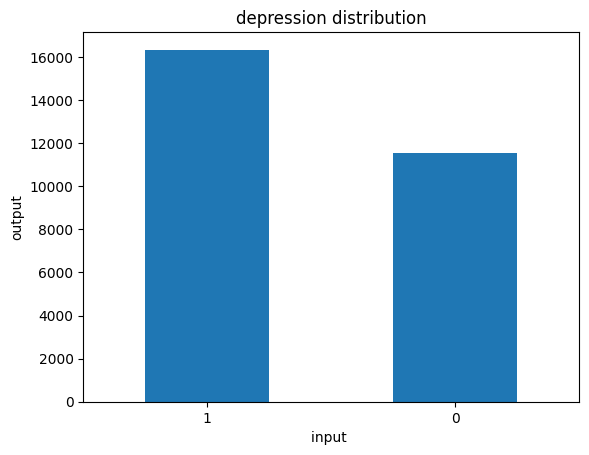

In [33]:
import matplotlib.pyplot as plt

count_classes = pd.value_counts(y, sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("depression distribution")

plt.xticks(range(2))

plt.xlabel("input ")

plt.ylabel("output")

In [34]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [35]:
from collections import Counter
print(Counter(y))

Counter({1: 16336, 0: 11565})


In [36]:
scale_pos_weight = 11565 / 16336  # ≈ 0.7076


In [37]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize model
model = XGBClassifier(
    scale_pos_weight=0.7076,         # Imbalance correction
    use_label_encoder=False,
    eval_metric='logloss',           # Avoids warning
    random_state=42
)

# Train model
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

# Evaluate
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2343    0]
 [   0 3238]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2343
           1       1.00      1.00      1.00      3238

    accuracy                           1.00      5581
   macro avg       1.00      1.00      1.00      5581
weighted avg       1.00      1.00      1.00      5581



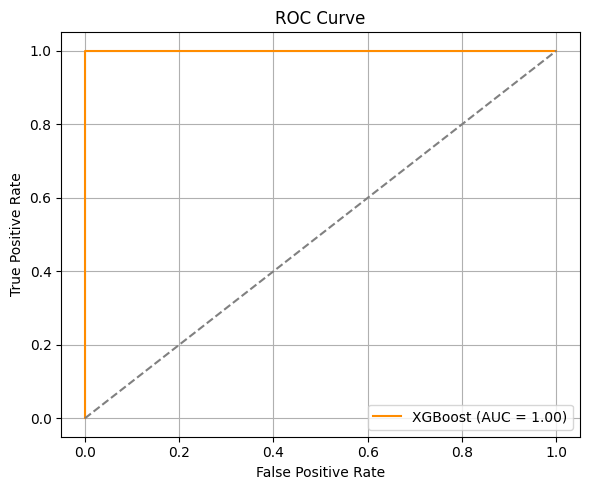

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for class 1
y_probs = model.predict_proba(x_test)[:, 1]  # [:,1] = prob of positive class (label 1)

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

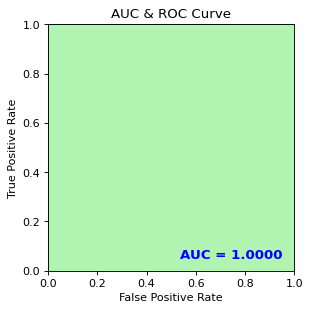

In [39]:
#plotting the ROC(Recieving operative characteristics) and AUC(area under the curve)
roc_auc = roc_auc_score(y_test, y_pred)

false_positive_rate, true_positive_rate, thresolds =roc_curve(y_test, y_pred)

plt.figure(figsize=(5, 4), dpi=80)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % roc_auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [40]:
df_encoded.corr()["Depression"].sort_values(ascending=False)


Depression                                   1.000000
Have you ever had suicidal thoughts ?_Yes    0.546277
Academic Pressure                            0.474835
Academic_Pressure_worried                    0.429778
Financial Stress                             0.363568
                                               ...   
Sleep Duration_More than 8 hours            -0.081374
Study Satisfaction                          -0.167971
Work_Hours_norm_work                        -0.184966
Age                                         -0.226422
Academic_Pressure_no_worry                  -0.429693
Name: Depression, Length: 115, dtype: float64

In [41]:
correlated_with_target = df_encoded.corr()["Depression"].sort_values(ascending=False)
print(correlated_with_target.head(10))

Depression                                   1.000000
Have you ever had suicidal thoughts ?_Yes    0.546277
Academic Pressure                            0.474835
Academic_Pressure_worried                    0.429778
Financial Stress                             0.363568
Financial_Stress_cat_unmanaged               0.325607
Work/Study Hours                             0.208563
Dietary Habits_Unhealthy                     0.189352
Work_Hours_heavy_work                        0.175731
Degree_Class 12                              0.130970
Name: Depression, dtype: float64


In [42]:
df_encoded[["Depression", "Have you ever had suicidal thoughts ?_Yes"]].value_counts()


Depression  Have you ever had suicidal thoughts ?_Yes
1           1                                            13957
0           0                                             7866
            1                                             3699
1           0                                             2379
Name: count, dtype: int64